# Wavelet
*  Jose Gonzalez Lopez
*  Mykola Liashuha

In [20]:
import scipy #Library for signal analysis
import matplotlib.pyplot as plt #Plot
import numpy as np #Operations
import cv2 #Read images and do operations
import IPython.display as ipd
import numpy.random #For generating noise

from scipy.io import wavfile #Read wavfiles
from scipy.signal import welch,stft,istft #Get power density estimated, short fourier transform

In [21]:
from __future__ import division
from nt_toolbox.general import *
from nt_toolbox.signal import *
%load_ext autoreload
%autoreload 2
%pylab inline
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/home/mykola/anaconda3/envs/nets/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray', 'std', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [102]:
'''
Signal-to-noise ratio
x: original signal
y: changed(noisy) signal
'''
def snr(x, y):
#     return 20*np.log10(np.linalg.norm(x)/np.linalg.norm(x-y))
    return 20*np.log10(np.sqrt(np.power(x, 2).sum())/np.sqrt(np.power(x-y, 2).sum()))

In [93]:
l = [1,2,3,4,5,6]

np.sqrt(np.power(l, 2).sum()), np.linalg.norm(l)

(9.539392014169456, 9.539392014169456)

In [23]:
img = cv2.imread('barbara.jpg')
gray = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
gray = gray / 255.


In [24]:
stds = [130,70,40, 24,13]
noisy_imgs=[]
for std in stds:
    noise = numpy.random.normal(0, 1, size=gray.shape)
    img_noise = gray + std*noise
    noisy_imgs.append(img_noise)

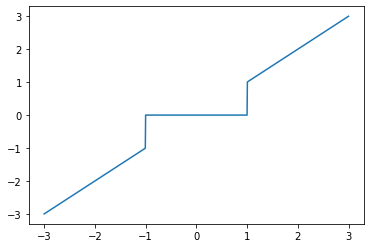

In [25]:
#Hard

def hard_operator(T, alpha):
    return alpha*(np.abs(alpha)>T)

T = 1
alpha = np.linspace(-3,3,1000);

plt.plot(alpha, alpha*(np.abs(alpha)>T))

In [26]:
# !pip install PyWavelets

In [95]:
from scipy import signal
import matplotlib.pyplot as plt
import pywt

coeffs = pywt.dwt2(gray, 'haar')
cA, (cH, cV, cD) = coeffs

# widths = np.arange(1, 31)
# cwtmatr = signal.cwt(img, signal.ricker, widths)
# plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
#            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
# plt.show()

In [96]:
cA.shape, cH.shape, cV.shape, cD.shape

((256, 256), (256, 256), (256, 256), (256, 256))

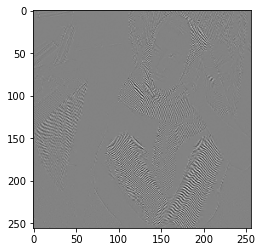

In [97]:
plt.imshow(cD, cmap='gray')

In [98]:
h = [0, .482962913145, .836516303738, .224143868042, -.129409522551]
h = h/norm(h)
Jmin = 2

In [99]:
gray= np.array(gray)
gray

array([[0.1254902 , 0.13333333, 0.13333333, ..., 0.11764706, 0.23921569,
        0.41176471],
       [0.1254902 , 0.12941176, 0.12941176, ..., 0.1254902 , 0.24705882,
        0.41960784],
       [0.11764706, 0.1254902 , 0.1254902 , ..., 0.1372549 , 0.25882353,
        0.43137255],
       ...,
       [0.16862745, 0.16862745, 0.16078431, ..., 0.40784314, 0.40784314,
        0.40784314],
       [0.16862745, 0.16862745, 0.16470588, ..., 0.42745098, 0.41960784,
        0.41176471],
       [0.16862745, 0.16862745, 0.16470588, ..., 0.44705882, 0.43137255,
        0.41176471]])

In [100]:
sigma = 0.08

noise = numpy.random.normal(0, 1, size=gray.shape)
img_noise = gray + sigma*noise
noisy_imgs.append(img_noise)
T = 3*sigma


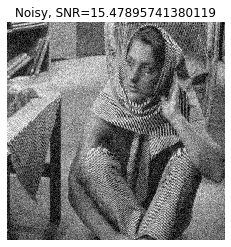

In [103]:
imageplot(clamp(img_noise), 'Noisy, SNR=' + str(snr(gray,img_noise)) )

In [57]:
a = perform_wavortho_transf(img_noise,Jmin,+1,h)

In [58]:
a

array([[ 5.20759432e+01,  4.20725743e+01,  5.05226334e+01, ...,
        -7.70561909e-02,  2.06842354e-02, -2.79309096e-01],
       [ 4.84759781e+01,  6.60903688e+01,  8.22320242e+01, ...,
        -5.04242240e-02,  1.63975790e-01, -1.66208985e-01],
       [ 6.24180077e+01,  7.17566859e+01,  7.10742555e+01, ...,
        -6.69146680e-02,  1.02138907e-01, -4.06504395e-01],
       ...,
       [-9.29672946e-02,  7.06706486e-02, -4.32511240e-02, ...,
        -3.90044856e-02,  3.91849549e-02,  4.35054688e-03],
       [-2.26446343e-02, -6.28999997e-02,  6.28887179e-02, ...,
         7.06404356e-02, -1.51974301e-03, -4.06001846e-02],
       [-2.13322762e-01, -6.91255957e-02, -7.38295820e-02, ...,
        -2.06031972e-02,  4.28255261e-02, -8.45450463e-02]])

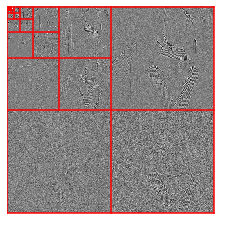

In [59]:
plot_wavelet(a,Jmin);

In [60]:
def thresh_hard(u,t):return u*(abs(u)>t)
aT = thresh_hard(a, T)

array([[0.24909128, 0.        , 0.21041272, ..., 0.5       , 0.5       ,
        0.30970088],
       [0.15944949, 0.59806084, 1.        , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.50661634, 0.73915633, 0.72216331, ..., 0.5       , 0.5       ,
        0.22304007],
       ...,
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ]])

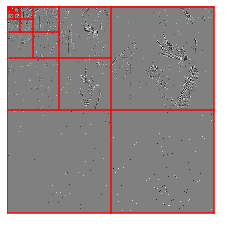

In [61]:
plot_wavelet(aT,Jmin)

In [62]:
fHard = perform_wavortho_transf(aT,Jmin,-1,h)

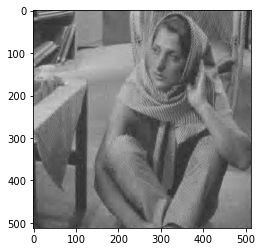

In [63]:
plt.imshow(fHard, cmap='gray')

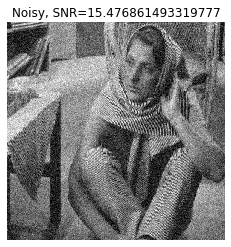

In [64]:
imageplot(clamp(img_noise), 'Noisy, SNR=' + str(snr(gray,img_noise)) )

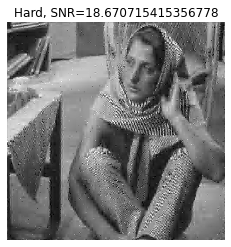

In [65]:

imageplot(clamp(fHard), 'Hard, SNR=' + str(snr(gray,fHard)) )

# Soft

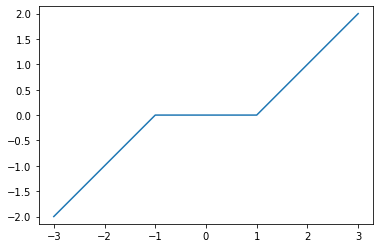

In [66]:
def thresh_soft(u,t):return maximum(1-t/abs(u), 0)*u
alpha = linspace(-3,3,1000)
plot(alpha, thresh_soft(alpha,1))
axis('equal');

In [86]:
T = 1#3/2*sigma

In [87]:
aT = thresh_soft(a,T)
aT[:2^Jmin:,:2^Jmin:] = a[:2^Jmin:,:2^Jmin:]
fSoft = perform_wavortho_transf(aT,Jmin,-1,h)

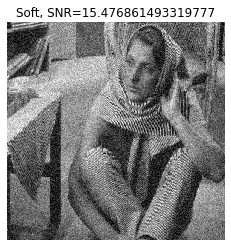

In [88]:
imageplot(clamp(img_noise), 'Soft, SNR=' + str(snr(gray,img_noise)) )

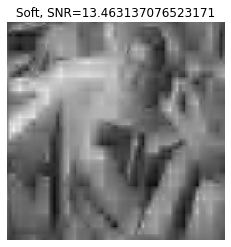

In [89]:
imageplot(clamp(fSoft), 'Soft, SNR=' + str(snr(gray,fSoft)) )

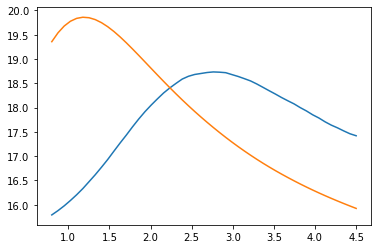

In [91]:
ran = np.linspace(0.8, 4.5, num=50)*sigma

hard = []
soft = []

for T in ran:
    a = perform_wavortho_transf(img_noise,Jmin,+1,h)
    
    #hard
    aT = thresh_hard(a, T)
    fHard = perform_wavortho_transf(aT,Jmin,-1,h)
    hard.append(snr(gray,fHard))
    
    #soft
    aT = thresh_soft(a,T)
    aT[:2^Jmin:,:2^Jmin:] = a[:2^Jmin:,:2^Jmin:]
    fSoft = perform_wavortho_transf(aT,Jmin,-1,h)
    soft.append(snr(gray,fSoft))
    
plt.plot(ran/sigma, hard)
plt.plot(ran/sigma, soft)
plt.show()

# Translation invariant

In [104]:
m = 4

In [106]:
[dY,dX] = meshgrid(arange(0,m),arange(0,m))
delta = concatenate( (dX.reshape(m*m,1), dY.reshape(m*m,1)), axis=1)


In [110]:
n = gray.shape[0]
fTI = zeros([n,n])
T = 3*sigma
for i in arange(0,m*m):
    fS = circshift(img_noise,delta[i,:])
    a = perform_wavortho_transf(fS,Jmin,1,h)
    aT = thresh_hard(a,T)
    fS = perform_wavortho_transf(aT,Jmin,-1,h)
    fS = circshift(fS,-delta[i,:])
    fTI = i/(i+1.0)*fTI + 1.0/(i+1)*fS

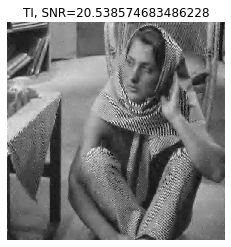

In [111]:
imageplot(clamp(fTI), 'TI, SNR=' + str(snr(gray,fTI)) )
